In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import torch.nn as nn
import torch
import torch.optim as optimizer
from tqdm import tqdm
import math

# Program working properly, includes age
# Very finiky

In [3]:
# Quantifying incoming players

next_player_path = Path.cwd().joinpath("next_player_predictions.xlsx")

next_player_sheet_total = pd.ExcelFile(next_player_path)

next_player_sheet = pd.read_excel(next_player_sheet_total, 'next_player_prediction')

In [4]:
np.array(next_player_sheet.iloc[-1].values[[2, 4, 5, 6, 7, 8,10]], dtype=np.float32)

array([29.       , 55.5      ,  0.73     , 60.       ,  0.77     ,
       78.5      ,  3.6892667], dtype=float32)

In [5]:
len(next_player_sheet['Last Name'].values)

529

In [6]:
# Dataset creation

next_data_set = []
indecies = [2, 4, 5, 6, 7, 8, 10]

for i, player in enumerate(next_player_sheet['Last Name'].values):
    player_index = i
    next_data_set.append(np.append(next_player_sheet.iloc[i].values[indecies], ord(next_player_sheet.iloc[i].values[1][0])))
    

    

In [7]:
price_csv_path = Path.cwd().joinpath("Player_price_model_data.xlsx")
price_csv_path.exists()

price_csv = pd.ExcelFile(price_csv_path)

players_sheet = pd.read_excel(price_csv, 'value_predictions')
prices_sheet = pd.read_excel(price_csv, 'price_auction_results')

In [8]:
next_player_sheet[next_player_sheet['Player'] == 'Connor McDavid']['Age'].values[0]

26

In [9]:
# This line just creates a new array with the proper name format to compare with
price_name_index = [player.split(".")[1].upper()[0:(player+" ").split(".")[1].upper().find(" ")] for player in prices_sheet['Player'].values]

In [10]:
prices_sheet.iloc[2].values[-2]=='A'

False

In [11]:
# Dataset creation

data_set = []
indecies = [3, 4, 5, 6, 7, 9]

for i, player in enumerate(players_sheet['Last Name'].values):
    player_index = i
    
        # Something about this area is wrong
    try:
        price_index = price_name_index.index(player.upper())
        player_age = next_player_sheet[next_player_sheet['Last Name'] == player]['Age'].values[0]
        print(prices_sheet.iloc[price_index].values[-1])
        print(player)
        print(prices_sheet.iloc[price_index].values[-2])


        # This looks complicated because we need to add age to the beginning, make position available as a number, and add price to the end
        if prices_sheet.iloc[price_index].values[-2]=='A':
            data_set.append([  np.append(np.append(np.array(player_age), players_sheet.iloc[i].values[indecies]), ord(players_sheet.iloc[i].values[1]))  , prices_sheet.iloc[price_index].values[-1]])
            print("yes")
    except:
        ...

36
DRAISAITL
B
49
MCDAVID
Y
40
MATTHEWS
Y
27
MAKAR
X
40
BARKOV
A
yes
50
MACKINNON
A
yes
7
SHESTERKIN
B
24
STAMKOS
A
5
KAPRIZOV
B
26
JOSI
C
17
VASILEVSKIY
Z
32
HEDMAN
C
26
KUCHEROV
B
33
HUBERDEAU
A
yes
24
AHO
Y
15
GAUDREAU
A
yes
17
TKACHUK
Y
34
MARNER
A
yes
1
SAROS
B
20
RANTANEN
Z
13
DEMKO
A
yes
17
HELLEBUYCK
B
22
LINDHOLM
C
32
CROSBY
A
yes
15
ZIBANEJAD
Z
17
FOX
X
33
PANARIN
Z
28
CARLSON
A
yes
1
MARKSTROM
C
4
SOROKIN
B
23
CONNOR
A
yes
24
OVECHKIN
A
yes
16
KUEMPER
A
yes
14
LETANG
B
28
TAVARES
A
yes
22
HUGHES
W
33
PASTRNAK
A
yes
18
O'REILLY
Z
10
EKBLAD
C
21
RIELLY
A
yes
10
CAMPBELL
A
yes
28
SCHEIFELE
A
yes
17
KOPITAR
A
yes
29
KANE
A
yes
11
REINHART
B
22
GUENTZEL
Y
26
EICHEL
A
yes
6
THOMAS
B
17
LARKIN
Y
13
HINTZ
X
19
KUZNETSOV
A
yes
7
KADRI
A
yes
9
FIALA
A
yes
9
TARASENKO
A
yes
6
BUCHNEVICH
B
6
PAVELSKI
B
14
TOEWS
A
yes
10
FORSBERG
B
9
JARRY
B
10
ROBERTSON
B
29
KANE
A
yes
23
POINT
X
1
BOBROVSKY
B
19
GIROUX
A
19
HORVAT
B
21
MARCHAND
B
25
DEBRINCAT
A
yes
20
NYLANDER
A
yes
22
HERTL
A
yes
11
B

In [12]:
data_set

[[array([28, 288.85, 3.9, 265.94, 3.97, 168.89, 19.92187210247196, 67],
        dtype=object),
  40],
 [array([28, 282.0, 3.76, 228.91, 3.52, 167.87, 19.449430267949083, 67],
        dtype=object),
  50],
 [array([30, 256.5, 3.21, 283.68, 3.55, 148.41, 17.690705190528153, 87],
        dtype=object),
  33],
 [array([30, 250.05, 3.05, 302.05, 3.68, 117.98, 17.245851200356977, 87],
        dtype=object),
  15],
 [array([26, 245.5, 3.32, 246.84, 3.43, 164.68, 16.93203947085638, 87],
        dtype=object),
  34],
 [array([27, 244.8, 3.77, 232.55, 3.63, 133.75, 16.883760743240902, 71],
        dtype=object),
  13],
 [array([36, 237.85, 3.5, 232.7, 3.37, 176.08, 16.4044219476301, 67],
        dtype=object),
  32],
 [array([33, 230.0, 2.95, 236.5, 3.03, 139.5, 15.863010502227972, 68],
        dtype=object),
  28],
 [array([26, 225.6, 2.89, 237.43, 3.01, 124.22, 15.559544214359263, 87],
        dtype=object),
  23],
 [array([38, 225.0, 2.92, 236.02, 3.07, 104.46, 15.518162447831712, 87],
      

In [13]:
# Normalizing the data to standards
max_ppg = 5
max_points = 500
max_val = 25
max_char = 100
max_contract = 60
max_age = 50

for i, datapoint in enumerate(data_set):

    data_set[i][0][0] = datapoint[0][0]/max_age if not(math.isnan(datapoint[0][0])) else 0
    data_set[i][0][1] = datapoint[0][1]/max_points if not(math.isnan(datapoint[0][1])) else 0
    data_set[i][0][2] = datapoint[0][2]/max_ppg if not(math.isnan(datapoint[0][2])) else 0
    data_set[i][0][3] = datapoint[0][3]/max_points if not(math.isnan(datapoint[0][3])) else 0
    data_set[i][0][4] = datapoint[0][4]/max_ppg if not(math.isnan(datapoint[0][4])) else 0
    data_set[i][0][5] = datapoint[0][5]/max_points if not(math.isnan(datapoint[0][5])) else 0
    data_set[i][0][6] = datapoint[0][6]/max_val if not(math.isnan(datapoint[0][6])) else 0
    data_set[i][0][7] = datapoint[0][7]/max_char if not(math.isnan(datapoint[0][7])) else 0

    data_set[i][1] = datapoint[1]/max_contract if not(math.isnan(datapoint[1])) else 0

In [14]:
data_set[0]

[array([0.56, 0.5777, 0.78, 0.53188, 0.794, 0.33777999999999997,
        0.7968748840988783, 0.67], dtype=object),
 0.6666666666666666]

In [15]:
data_set[5][1]*max_contract

13.0

In [16]:
x_train = torch.tensor(np.array([entry[0] for entry in data_set[:110]], dtype=np.float32))
x_test = torch.tensor(np.array([entry[0] for entry in data_set[110:]], dtype=np.float32))

# Extra dimension needed for the y data to keep consistent with x data
y_train = torch.tensor(np.array([[entry[1]] for entry in data_set[:110]], dtype=np.float32))
y_test = torch.tensor(np.array([[entry[1]] for entry in data_set[110:]], dtype=np.float32))

train_loss = 1
test_loss = 1

In [17]:
y_train.shape

torch.Size([110, 1])

In [18]:
# Defining the model
input_dims = 8
output_dims = 1
class price_predictor(nn.Module):
    def __init__(self) -> None:
        super().__init__()

        self.net = nn.Sequential(
            nn.Linear(input_dims, 128),
            nn.ReLU(),
            # nn.Linear(64, 64),
            # nn.Tanh(),
            nn.Linear(128, output_dims),
        )

    
    def forward(self, x):
        out = self.net(x)
        return out


In [19]:
# Defining

model = price_predictor()
loss_function = nn.MSELoss()
optimize = optimizer.AdamW(model.parameters(), lr=1e-4)
# scheduler = optimizer.lr_scheduler.CosineAnnealingLR(optimize, T_max=1, eta_min=1e-5)

epochs = 10000
test_epochs = 5

In [20]:
# Training Loop

pbar = tqdm(range(epochs), desc=f"Train Loss: {train_loss:1.4f} | Test Loss: {test_loss:1.4f}")

running_train_loss = []
running_test_loss = []
learning_rates = []

model.train()

for epoch in pbar:
    # Loss
    loss = loss_function(model(x_train), y_train)

    optimize.zero_grad()

    loss.backward()

    optimize.step()

    if epoch % test_epochs == 0:
        model.eval()
        test_loss = loss_function(model(x_test), y_test)
        model.train()
    
    running_train_loss.append(loss.detach().item())
    running_test_loss.append(test_loss.detach().item())

    pbar.set_description(f"Train Loss: {loss:1.4f} | Test Loss: {test_loss:1.4f}")



Train Loss: 0.0029 | Test Loss: 0.0096: 100%|██████████| 10000/10000 [00:11<00:00, 856.01it/s]


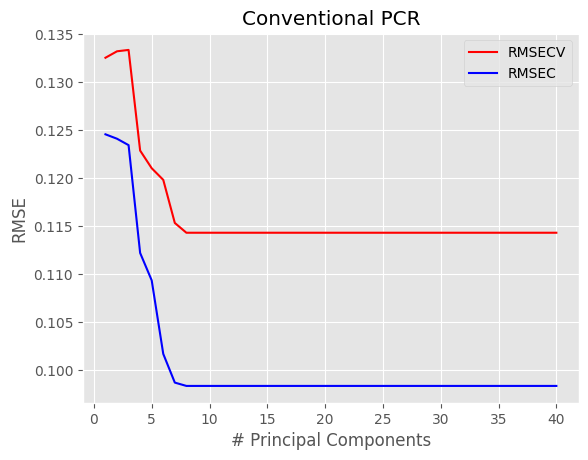

In [21]:
# linear analysis to predict prices


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

def simple_regression(X,y):
 
    # Create linear regression object
    regr = linear_model.LinearRegression()
 
    # Fit
    regr.fit(X, y)
 
    # Calibration
    y_c = regr.predict(X)
 
    # Cross-validation
    y_cv = cross_val_predict(regr, X, y, cv=10)
 
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
 
    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
 
    return(y_c, score_c, score_cv, mse_c, mse_cv)


def pcr(X,y, pc):
 
    ''' Step 1: PCA on input data'''
 
    # Define the PCA object
    pca = PCA()
 
    # Preprocess (2) Standardize features by removing the mean and scaling to unit variance
    Xstd = StandardScaler().fit_transform(X)
 
    # Run PCA producing the reduced variable Xred and select the first pc components
    Xreg = pca.fit_transform(Xstd)[:,:pc]
 
 
    ''' Step 2: regression on selected principal components'''
 
    y_cv, score_c, score_cv, mse_c, mse_cv = simple_regression(Xreg, y)
 
    return(y_cv, score_c, score_cv, mse_c, mse_cv)



# Read data: NIR spectra of peaches with corresponding Brix calibration data

X = x_train
y = y_train
 
npc = 40 # maximum number of principal components
pc = range(1,npc+1,1)
# Define arrays for R^2 and MSE
r2c = np.zeros(npc)
r2cv = np.zeros(npc)
msec = np.zeros(npc)
msecv = np.zeros(npc)
 
for i in pc:
    predicted, r2c[i-1], r2cv[i-1], msec[i-1], msecv[i-1] = pcr(X,y, pc=i)

with plt.style.context(('ggplot')):
    plt.plot(pc, np.sqrt(msecv[:]), 'r', label = "RMSECV")
    plt.plot(pc, np.sqrt(msec[:]), 'b', label = "RMSEC")
    plt.xlabel("# Principal Components")
    plt.ylabel("RMSE")
    plt.title("Conventional PCR")
    plt.legend()
    plt.show()

In [22]:
predicted, r2c[i-1], r2cv[i-1], msec[i-1], msecv[i-1] = pcr(X,y, pc=1)

In [23]:
players_sheet.iloc[i].values[0]

'Aaron Ekblad'

In [24]:
regr = linear_model.LinearRegression()

# Fit
regr.fit(X, y)

# Calibration
y_c = regr.predict([X[0]])

In [25]:
# First we need to solve the knapsack problem, as we know the value, and now we also know the weight
# Our valuations will be linear from the value of the players in the position
# We will then display a range with what people will pay, along with the linear valuation


# First we quantify all the incoming players
# Then we solve the knapsack problem to get the most valuable players
# Then we linearly extrapolate value for all
# This becomes the recommended highest bid, and is listed in the app when players are searched, next to the status screens of each team


In [26]:
next_player_sheet

,Player,Position,Age,Last Name,Projected Overal Points,FP/g,Last Season Points,FP/g.1,Season Before Stats,FP/g.2,Fantrax Linear Value
0,Connor McDavid,C,26,MCDAVID,404.20,4.93,405.53,4.95,322.42,4.03,26.868497
1,Leon Draisaitl,"C,W",27,DRAISAITL,352.35,4.40,340.59,4.26,314.37,3.93,23.421858
2,Nathan MacKinnon,C,28,MACKINNON,324.50,4.21,291.47,4.11,228.91,3.52,21.570577
3,Auston Matthews,C,26,MATTHEWS,301.65,4.02,243.02,3.28,305.79,4.19,20.051663
4,Cale Makar,D,24,MAKAR,278.00,3.71,223.00,3.72,310.00,4.03,18.479570
...,...,...,...,...,...,...,...,...,...,...,...
524,Derek Forbort,D,31,FORBORT,56.00,0.86,51.00,0.94,47.00,0.62,3.722503
525,Brendan Gallagher,W,31,GALLAGHER,56.00,0.93,33.58,0.91,51.71,0.92,3.722503
526,Zach Whitecloud,D,26,WHITECLOUD,56.00,0.93,46.00,0.78,77.50,1.31,3.722503
527,Klim Kostin,W,24,KOSTIN,55.65,0.79,59.08,1.04,20.56,0.51,3.699238


In [27]:
for i, datapoint in enumerate(next_data_set):

    next_data_set[i][0] = datapoint[0]/max_age if not(math.isnan(datapoint[0])) else 0
    next_data_set[i][1] = datapoint[1]/max_points if not(math.isnan(datapoint[1])) else 0
    next_data_set[i][2] = datapoint[2]/max_ppg if not(math.isnan(datapoint[2])) else 0
    next_data_set[i][3] = datapoint[3]/max_points if not(math.isnan(datapoint[3])) else 0
    next_data_set[i][4] = datapoint[4]/max_ppg if not(math.isnan(datapoint[4])) else 0
    next_data_set[i][5] = datapoint[5]/max_points if not(math.isnan(datapoint[5])) else 0
    next_data_set[i][6] = datapoint[6]/max_val if not(math.isnan(datapoint[6])) else 0
    next_data_set[i][7] = datapoint[7]/max_char if not(math.isnan(datapoint[7])) else 0

In [28]:

len(data_set[0][0])

8

In [29]:
len(next_data_set[0])

8

In [30]:

for i, player in enumerate(next_data_set):
    next_data_set[i] = np.append(np.append(next_data_set[i], (model(torch.tensor(np.array(next_data_set[i], dtype=np.float32) )) ).detach().numpy() ), regr.predict( [np.array(next_data_set[i], dtype=np.float32)] ))

In [31]:
for i, datapoint in enumerate(next_data_set):

    next_data_set[i][0] = datapoint[0]*max_age if not(math.isnan(datapoint[0])) else 0
    next_data_set[i][1] = datapoint[1]*max_points if not(math.isnan(datapoint[1])) else 0
    next_data_set[i][2] = datapoint[2]*max_ppg if not(math.isnan(datapoint[2])) else 0
    next_data_set[i][3] = datapoint[3]*max_points if not(math.isnan(datapoint[3])) else 0
    next_data_set[i][4] = datapoint[4]*max_ppg if not(math.isnan(datapoint[4])) else 0
    next_data_set[i][5] = datapoint[5]*max_points if not(math.isnan(datapoint[5])) else 0
    next_data_set[i][6] = datapoint[6]*max_val if not(math.isnan(datapoint[6])) else 0
    next_data_set[i][7] = datapoint[7]*max_char if not(math.isnan(datapoint[7])) else 0

    next_data_set[i][8] = datapoint[8]*max_contract if not(math.isnan(datapoint[8])) else 0
    next_data_set[i][9] = datapoint[9]*max_contract if not(math.isnan(datapoint[9])) else 0

In [32]:
expected_value = []
linear_expected_value = []
for price in next_data_set:
    expected_value.append(price[-2])
    linear_expected_value.append(price[-1])


next_player_sheet['Expected Value'] = np.array(expected_value).clip(min=1)
next_player_sheet['Linear Expected Value'] = np.array(linear_expected_value).clip(min=1)


In [33]:
next_player_sheet

,Player,Position,Age,Last Name,Projected Overal Points,FP/g,Last Season Points,FP/g.1,Season Before Stats,FP/g.2,Fantrax Linear Value,Expected Value,Linear Expected Value
0,Connor McDavid,C,26,MCDAVID,404.20,4.93,405.53,4.95,322.42,4.03,26.868497,85.406706,57.250085
1,Leon Draisaitl,"C,W",27,DRAISAITL,352.35,4.40,340.59,4.26,314.37,3.93,23.421858,79.822254,52.701663
2,Nathan MacKinnon,C,28,MACKINNON,324.50,4.21,291.47,4.11,228.91,3.52,21.570577,57.791995,43.076373
3,Auston Matthews,C,26,MATTHEWS,301.65,4.02,243.02,3.28,305.79,4.19,20.051663,78.344822,49.512345
4,Cale Makar,D,24,MAKAR,278.00,3.71,223.00,3.72,310.00,4.03,18.479570,69.351153,52.054868
...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,Derek Forbort,D,31,FORBORT,56.00,0.86,51.00,0.94,47.00,0.62,3.722503,8.068354,1.000000
525,Brendan Gallagher,W,31,GALLAGHER,56.00,0.93,33.58,0.91,51.71,0.92,3.722503,10.552618,1.939411
526,Zach Whitecloud,D,26,WHITECLOUD,56.00,0.93,46.00,0.78,77.50,1.31,3.722503,3.510333,4.280726
527,Klim Kostin,W,24,KOSTIN,55.65,0.79,59.08,1.04,20.56,0.51,3.699238,6.600044,1.000000


In [34]:
# Create Value Weight matrix so that the best combination can be determined
# Be sure to round value, so that whole numbers are used

value_weight = []

for i, player in enumerate(next_player_sheet['Player'].values):
    to_append = next_player_sheet.iloc[i].values[[0, 1, 4, -2]]

    # Augment to round the price and make the position one value
    to_append[1] = to_append[1][0]
    to_append[-1] = int(np.round(to_append[-1]))
    value_weight.append(to_append)

value_weight = np.array(value_weight)

value_weight = value_weight[value_weight[:, 2].argsort()]


In [35]:
value_weight[np.where(value_weight == 'C')[0]][1][0]

'Emil Bemstrom'

In [36]:
y_test[0]*60

tensor([11.])

In [37]:
x_test[0][1]*max_points

tensor(50.)

In [38]:
from pulp import *
# Solve the knapsack problem given the parameters for the best possible solution
# Can be linearly interpreted, or can be solved in real time during auction


# Logic for solving problem: https://medium.com/sports-analytics-and-data-science/fantasy-premier-league-lineup-optimization-using-mixed-linear-programming-the-knapsack-problem-3c19b3b007a2
# https://github.com/breeko/Fantasy_LP/blob/master/fantasy_lp_final.ipynb

# For the positions, we assume that the utility slot will go to a center, for maximum efficiency
goalies = 3
defense = 7
winger = 8
center = 7

budget = 260
num_players = len(value_weight)

pos_num_available = {
    "G": goalies,
    "D": defense,
    "W": winger,
    "C": center,
}


salary_array = {}
point_array = {}

for pos in list(pos_num_available.keys()):
    salaries = {}
    points = {}
    for i, player in enumerate(value_weight[np.where(value_weight == pos)[0]]):
        salaries[value_weight[np.where(value_weight == pos)[0]][i][0]] = (value_weight[np.where(value_weight == pos)[0]][i][-1])
        points[value_weight[np.where(value_weight == pos)[0]][i][0]] = (value_weight[np.where(value_weight == pos)[0]][i][-2])

    salary_array[pos] = salaries
    point_array[pos] = points




In [39]:
_vars = {k: LpVariable.dict(k, v, cat="Binary") for k, v in point_array.items()}

prob = LpProblem("Fantasy", LpMaximize)
rewards = []
costs = []
position_constraints = []

# Setting up the reward
for k, v in _vars.items():
    costs += lpSum([salary_array[k][i] * _vars[k][i] for i in v])
    rewards += lpSum([point_array[k][i] * _vars[k][i] for i in v])
    prob += lpSum([_vars[k][i] for i in v]) <= pos_num_available[k]
    # prob += lpSum([pos_flex[k] * _vars[k][i] for i in v]) <= pos_flex_available
    
prob += lpSum(rewards)
prob += lpSum(costs) <= budget

In [40]:
prob.solve()

1

In [41]:
def summary(prob):
    div = '---------------------------------------\n'
    print("Variables:\n")
    score = str(prob.objective)
    constraints = [str(const) for const in prob.constraints.values()]
    for v in prob.variables():
        score = score.replace(v.name, str(v.varValue))
        constraints = [const.replace(v.name, str(v.varValue)) for const in constraints]
        if v.varValue != 0:
            print(v.name, "=", v.varValue)
    print(div)
    print("Constraints:")
    for constraint in constraints:
        constraint_pretty = " + ".join(re.findall("[0-9\.]*\*1.0", constraint))
        if constraint_pretty != "":
            print("{} = {}".format(constraint_pretty, eval(constraint_pretty)))
    print(div)
    print("Score:")
    score_pretty = " + ".join(re.findall("[0-9\.]+\*1.0", score))
    print("{} = {}".format(score_pretty, eval(score)))

In [42]:
summary(prob)

Variables:

C_Dylan_Cozens = 1.0
C_Evgeni_Malkin = 1.0
C_Jack_Eichel = 1.0
C_Jamie_Benn = 1.0
C_Matty_Beniers = 1.0
C_Nick_Suzuki = 1.0
C_Ryan_Nugent_Hopkins = 1.0
D_Brandon_Montour = 1.0
D_Dougie_Hamilton = 1.0
D_Erik_Karlsson = 1.0
D_Josh_Morrissey = 1.0
D_Mikhail_Sergachev = 1.0
D_Miro_Heiskanen = 1.0
D_Vince_Dunn = 1.0
G_Alexandar_Georgiev = 1.0
G_Linus_Ullmark = 1.0
G_Stuart_Skinner = 1.0
W_Alex_Tuch = 1.0
W_Andrei_Kuzmenko = 1.0
W_Brandon_Hagel = 1.0
W_Kaapo_Kakko = 1.0
W_Lukas_Reichel = 1.0
W_Martin_Necas = 1.0
W_Matt_Boldy = 1.0
W_Zach_Hyman = 1.0
---------------------------------------

Constraints:
15*1.0 + 10*1.0 + 19*1.0 + 13*1.0 + 7*1.0 + 7*1.0 + 19*1.0 + 14*1.0 + 11*1.0 + 16*1.0 + 12*1.0 + 16*1.0 + 10*1.0 + 11*1.0 + 5*1.0 + 7*1.0 + 2*1.0 + 7*1.0 + 2*1.0 + 10*1.0 + 4*1.0 + 12*1.0 + 12*1.0 + 3*1.0 + 16*1.0 = 260.0
---------------------------------------

Score:
200.45*1.0 + 180.2*1.0 + 218.35*1.0 + 185.65*1.0 + 184.55*1.0 + 190.15*1.0 + 233.45*1.0 + 198.0*1.0 + 213.5*1.0 + 

In [43]:
for v in prob.variables():
    if v.varValue == 1:
        print(f"Player: {v.toDict()['name']} | Points: {v.toDict()['dj']}")

Player: C_Dylan_Cozens | Points: 200.45
Player: C_Evgeni_Malkin | Points: 180.2
Player: C_Jack_Eichel | Points: 218.35
Player: C_Jamie_Benn | Points: 185.65
Player: C_Matty_Beniers | Points: 184.55
Player: C_Nick_Suzuki | Points: 190.15
Player: C_Ryan_Nugent_Hopkins | Points: 233.45
Player: D_Brandon_Montour | Points: 198.0
Player: D_Dougie_Hamilton | Points: 213.5
Player: D_Erik_Karlsson | Points: 249.5
Player: D_Josh_Morrissey | Points: 198.0
Player: D_Mikhail_Sergachev | Points: 196.0
Player: D_Miro_Heiskanen | Points: 197.0
Player: D_Vince_Dunn | Points: 195.0
Player: G_Alexandar_Georgiev | Points: 214.0
Player: G_Linus_Ullmark | Points: 200.2
Player: G_Stuart_Skinner | Points: 176.8
Player: W_Alex_Tuch | Points: 189.85
Player: W_Andrei_Kuzmenko | Points: 181.5
Player: W_Brandon_Hagel | Points: 155.6
Player: W_Kaapo_Kakko | Points: 121.05
Player: W_Lukas_Reichel | Points: 164.3
Player: W_Martin_Necas | Points: 177.35
Player: W_Matt_Boldy | Points: 177.8
Player: W_Zach_Hyman | Point

In [44]:
# Here we finally extract the value per dollar we desire

center_tot_pts = 0
center_tot_con = 0
winger_tot_pts = 0
winger_tot_con = 0
goalie_tot_pts = 0
goalie_tot_con = 0
defense_tot_pts = 0
defense_tot_con = 0

for v in prob.variables():
    if v.varValue == 1:
        for player in value_weight:
            if player[0]==v.toDict()['name'][2:].replace("_", " "):
                contract_value = player[-1]

        if v.toDict()['name'][0] == 'C':
            center_tot_pts += v.toDict()['dj']
            center_tot_con += contract_value
                
        if v.toDict()['name'][0] == 'W':
            winger_tot_pts += v.toDict()['dj']
            winger_tot_con += contract_value

        if v.toDict()['name'][0] == 'G':
            goalie_tot_pts += v.toDict()['dj']
            goalie_tot_con += contract_value
        
        if v.toDict()['name'][0] == 'D':
            defense_tot_pts += v.toDict()['dj']
            defense_tot_con += contract_value
        
        print(f"{v.toDict()['name'][0]} {v.toDict()['name'][2:]} | Pred points: {v.toDict()['dj']}  | Pred price: {contract_value}")

center_pts_per_cost = center_tot_pts/center_tot_con
winger_pts_per_cost = winger_tot_pts/winger_tot_con
goalie_pts_per_cost = goalie_tot_pts/goalie_tot_con
defense_pts_per_cost = defense_tot_pts/defense_tot_con



C Dylan_Cozens | Pred points: 200.45  | Pred price: 15
C Evgeni_Malkin | Pred points: 180.2  | Pred price: 10
C Jack_Eichel | Pred points: 218.35  | Pred price: 19
C Jamie_Benn | Pred points: 185.65  | Pred price: 13
C Matty_Beniers | Pred points: 184.55  | Pred price: 7
C Nick_Suzuki | Pred points: 190.15  | Pred price: 7
C Ryan_Nugent_Hopkins | Pred points: 233.45  | Pred price: 7
D Brandon_Montour | Pred points: 198.0  | Pred price: 14
D Dougie_Hamilton | Pred points: 213.5  | Pred price: 11
D Erik_Karlsson | Pred points: 249.5  | Pred price: 16
D Josh_Morrissey | Pred points: 198.0  | Pred price: 12
D Mikhail_Sergachev | Pred points: 196.0  | Pred price: 16
D Miro_Heiskanen | Pred points: 197.0  | Pred price: 10
D Vince_Dunn | Pred points: 195.0  | Pred price: 11
G Alexandar_Georgiev | Pred points: 214.0  | Pred price: 5
G Linus_Ullmark | Pred points: 200.2  | Pred price: 7
G Stuart_Skinner | Pred points: 176.8  | Pred price: 2
W Alex_Tuch | Pred points: 189.85  | Pred price: 7
W A

In [45]:
print(winger_pts_per_cost)

20.41136363636364


In [46]:
next_player_sheet[next_player_sheet['Last Name'] == 'ZUCCARELLO']['Position'].values[0][0]

'W'

In [58]:
next_player_sheet[next_player_sheet['Last Name'] == 'HUGHES']

,Player,Position,Age,Last Name,Projected Overal Points,FP/g,Last Season Points,FP/g.1,Season Before Stats,FP/g.2,Fantrax Linear Value,Expected Value,Linear Expected Value,Bid Value
6,Jack Hughes,C,22,HUGHES,275.95,3.45,248.2,3.18,131.48,2.68,18.343300,34.657195,28.777227,15.453834
32,Quinn Hughes,D,23,HUGHES,229.50,2.94,242.5,3.11,217.00,2.86,15.255616,38.758539,32.406700,15.453834
176,Luke Hughes,D,20,HUGHES,141.00,1.83,7.0,3.50,0.00,0.00,9.372731,17.523124,25.805109,15.453834


In [48]:
# Extrapolating for all players' value

bid_val = []
for player in next_player_sheet['Last Name']:
    pos = next_player_sheet[next_player_sheet['Last Name'] == player]['Position'].values[0][0]
    points = next_player_sheet[next_player_sheet['Last Name'] == player]['Projected Overal Points'].values[0]

    if pos == 'C':
        bid_val.append(points/center_pts_per_cost)
    elif pos == 'D':
        bid_val.append(points/defense_pts_per_cost)
    elif pos == 'W':
        bid_val.append(points/winger_pts_per_cost)
    elif pos == 'G':
        bid_val.append(points/goalie_pts_per_cost)
    else:
        print("ERROR")
        print(player)

next_player_sheet['Bid Value'] = bid_val
    

In [49]:

young_guns = (next_player_sheet[next_player_sheet['Age'] <= 23])

In [53]:
sorta_young = (next_player_sheet[next_player_sheet['Age'] == 24])

In [52]:
import xlsxwriter

# # Create a new Excel file and add the DataFrame as a sheet
# writer = pd.ExcelWriter('Linear Simularion (version 2).xlsx', engine='xlsxwriter')
# young_guns.to_excel(writer, sheet_name='Young Guns')

young_guns.to_excel('younguns.xlsx', sheet_name='Technologies')

# Save the Excel file
# writer.save()

In [54]:
sorta_young.to_excel('24.xlsx', sheet_name='Technologies')